In [280]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import cm

In [284]:
nama_negara = input("Masukkan nama negara: ")
tahun = input("Masukkan tahun: ")
nilai_b = input("Masukkan b besar negara: ")

In [272]:
file = open("kode_negara_lengkap.json").read()
file_si_json = json.loads(file)
input_nama_negara = nama_negara
cek = [i for i in file_si_json if i["name"].lower() == input_nama_negara.lower()]
list_input = [i["alpha-3"] for i in cek]

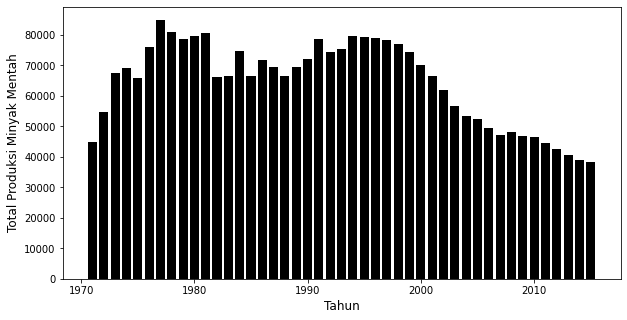

In [289]:
filename = "produksi_minyak_mentah.csv"
df = pd.read_csv(filename)
data_olah =df[(df["kode_negara"] == list_input[0])]
fig, ax = plt.subplots()
ax.bar(data_olah["tahun"], data_olah["produksi"], color="black")
ax.set_xlabel("Tahun", fontsize=12)
ax.set_ylabel("Total Produksi Minyak Mentah", fontsize=12)
fig.set_size_inches(10,5)

Text(0, 0.5, 'Total Produksi Minyak Mentah')

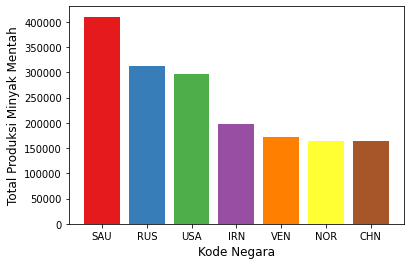

In [285]:
data_with_index = df.set_index("kode_negara")
data_with_index = data_with_index.drop(["WLD", "G20", "OECD", "OEU", "EU28"]) #menghapus value yang bukan negara
data_with_index = data_with_index.reset_index("kode_negara") #mengembalikan format dataframe pada kolom kode_negara
data_tahun = data_with_index[(data_with_index["tahun"] == int(tahun))] 
b_besar_negara_tahun = data_tahun.nlargest(int(nilai_b), ["produksi"])
fig, ax = plt.subplots()
cmap_name = 'Set1'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(b_besar_negara_tahun["kode_negara"])]
ax.bar(b_besar_negara_tahun["kode_negara"], b_besar_negara_tahun["produksi"], color=colors)
ax.set_xlabel("Kode Negara", fontsize=12)
ax.set_ylabel("Total Produksi Minyak Mentah", fontsize=12)

Text(0, 0.5, 'Total Produksi Minyak Mentah')

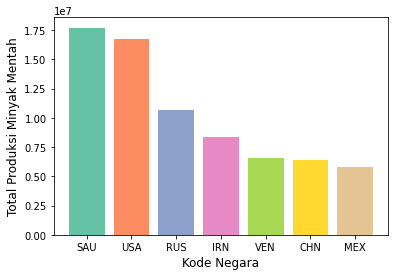

In [288]:
data_total_produksi = data_with_index.groupby(["kode_negara"])["produksi"].sum()
data_total_produksi.sort_values(ascending=False)
b_besar_negara_total = data_total_produksi.nlargest(int(nilai_b))
b_reset = b_besar_negara_total.reset_index()
cmap_name = 'Set2'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(b_reset["kode_negara"])]
fig, ax = plt.subplots()
ax.bar(b_reset["kode_negara"], b_reset["produksi"], color=colors)
ax.set_xlabel("Kode Negara", fontsize=12)
ax.set_ylabel("Total Produksi Minyak Mentah", fontsize=12)